In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [185]:
# read the dataset
retail_df = pd.read_csv("Online_Retail.csv", sep=",", encoding="ISO-8859-1", header=0)
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [186]:
retail_df.shape

(541909, 8)

In [187]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [188]:
round(retail_df.isnull().sum()/len(retail_df)*100,2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [189]:
retail_df.dropna(inplace=True)
retail_df.shape

(406829, 8)

In [190]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [191]:
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [192]:
#monetary
retail_df['amount']=retail_df['Quantity']*retail_df['UnitPrice']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom,20.34


In [193]:
grouped_df=retail_df.groupby(by='CustomerID')['amount'].sum()
grouped_df=grouped_df.reset_index()
grouped_df.head()

,CustomerID,amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [194]:
frequency=retail_df.groupby(by='CustomerID')['InvoiceNo'].count()
frequency=frequency.reset_index()
frequency.columns=['CustomerID','Frequency']
frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [195]:
grouped_df=pd.merge(grouped_df,frequency,on='CustomerID',how='inner')
grouped_df.head()

,CustomerID,amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [196]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
amount         406829 non-null float64
dtypes: float64(3), int64(1), object(5)
memory usage: 31.0+ MB


In [197]:
retail_df['InvoiceDate']=pd.to_datetime(retail_df['InvoiceDate'],format='%d-%m-%Y %H:%M')

In [198]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null datetime64[ns]
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
amount         406829 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 31.0+ MB


In [199]:
max_date=max(retail_df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [200]:
retail_df['recency']=max_date-retail_df['InvoiceDate']
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [201]:
recency=retail_df.groupby('CustomerID')['recency'].min()
recency=recency.reset_index()

In [202]:
grouped_df=pd.merge(grouped_df,recency,on='CustomerID',how='inner')
grouped_df.head()

,CustomerID,amount,Frequency,recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [203]:
# number of days only
grouped_df['recency'] = grouped_df['recency'].dt.days
grouped_df.head()

,CustomerID,amount,Frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [204]:
grouped_df.head()

,CustomerID,amount,Frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


{'whiskers': [<matplotlib.lines.Line2D at 0x1f63fb05710>,
 'caps': [<matplotlib.lines.Line2D at 0x1f63fb05fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f63fb055c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f63fb19860>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f63fb19c88>],
 'means': []}

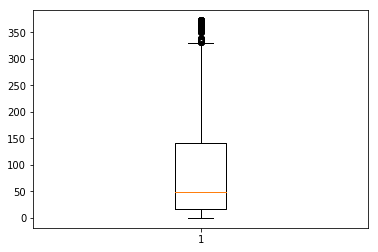

In [205]:
plt.boxplot(grouped_df['recency'])

In [206]:
# removing (statistical) outliers
Q1 = grouped_df.amount.quantile(0.05)
Q3 = grouped_df.amount.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.amount >= Q1 - 1.5*IQR) & (grouped_df.amount <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = grouped_df.recency.quantile(0.05)
Q3 = grouped_df.recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.recency >= Q1 - 1.5*IQR) & (grouped_df.recency <= Q3 + 1.5*IQR)]

# outlier treatment for Frequency
Q1 = grouped_df.Frequency.quantile(0.05)
Q3 = grouped_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Frequency >= Q1 - 1.5*IQR) & (grouped_df.Frequency <= Q3 + 1.5*IQR)]



{'whiskers': [<matplotlib.lines.Line2D at 0x1f65148c160>,
 'caps': [<matplotlib.lines.Line2D at 0x1f65148ca20>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f651482fd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1f63fb322b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f63fb326d8>],
 'means': []}

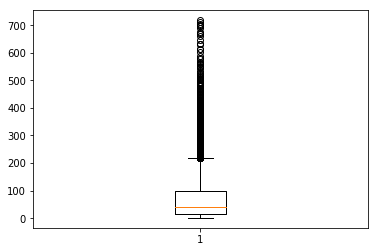

In [207]:
plt.boxplot(grouped_df['Frequency'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1f63fb7f978>,
 'caps': [<matplotlib.lines.Line2D at 0x1f63fb8a278>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f63fb7f828>],
 'medians': [<matplotlib.lines.Line2D at 0x1f63fb8aac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f63fb8aef0>],
 'means': []}

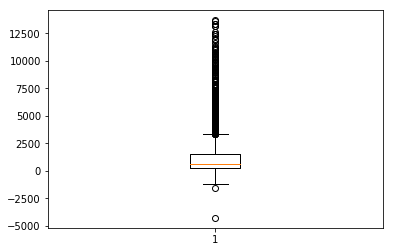

In [208]:
plt.boxplot(grouped_df['amount'])

In [209]:
rfm_df=grouped_df[['amount','Frequency','recency']]

In [210]:
rfm_df.head()

,amount,Frequency,recency
0,0.00,2,325
1,4310.00,182,1
2,1797.24,31,74
3,1757.55,73,18
4,334.40,17,309


In [211]:
scaler=StandardScaler()

In [212]:
rfm_df_scaled=scaler.fit_transform(rfm_df)

In [213]:
rfm_df_scaled.shape

(4293, 3)

In [214]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [215]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['amount', 'frequency', 'recency']

In [216]:
hopkins(rfm_df_scaled)

0.9537126064823526

In [217]:
rfm_scaled=pd.DataFrame(rfm_df_scaled)

In [218]:
rfm_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [219]:
kmeans=KMeans(n_clusters=4,max_iter=50)

In [220]:
kmeans.fit(rfm_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [221]:
len(kmeans.labels_)

4293

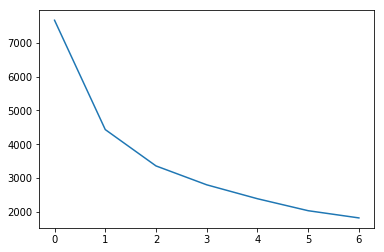

In [222]:
#elbow curve
range_n_clusters=[2,3,4,5,6,7,8]
ssd=[]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_scaled)
    ssd.append(kmeans.inertia_)
plt.plot(ssd)

In [223]:
#silhoutte analysis
range_n_clusters=[2,3,4,5,6,7,8]
ssd=[]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters,max_iter=50)
    kmeans.fit(rfm_df_scaled)
    cluster_labels=kmeans.labels_
    
   # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.5415858652525395
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.4816551560193964
For n_clusters=5, the silhouette score is 0.4658595948596644
For n_clusters=6, the silhouette score is 0.4171229822428261
For n_clusters=7, the silhouette score is 0.4155864933142358
For n_clusters=8, the silhouette score is 0.40172446522206007


In [224]:
#final model with k=3
kmeans=KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [225]:
kmeans.labels_

array([1, 2, 0, ..., 1, 0, 0])

In [226]:
grouped_df.head()

,CustomerID,amount,Frequency,recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [227]:
grouped_df['ClusterId']=kmeans.labels_

In [228]:
grouped_df.head(20)

,CustomerID,amount,Frequency,recency,ClusterId
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1
5,12352.0,1545.41,95,35,0
6,12353.0,89.00,4,203,1
7,12354.0,1079.40,58,231,1
8,12355.0,459.40,13,213,1
9,12356.0,2811.43,59,22,0


In [229]:
grouped_df[grouped_df['ClusterId']==1]

,CustomerID,amount,Frequency,recency,ClusterId
0,12346.0,0.00,2,325,1
4,12350.0,334.40,17,309,1
6,12353.0,89.00,4,203,1
7,12354.0,1079.40,58,231,1
8,12355.0,459.40,13,213,1
14,12361.0,189.90,10,286,1
18,12365.0,320.69,23,290,1
23,12373.0,364.60,14,310,1
26,12377.0,1628.12,77,314,1
31,12383.0,1839.31,100,184,1


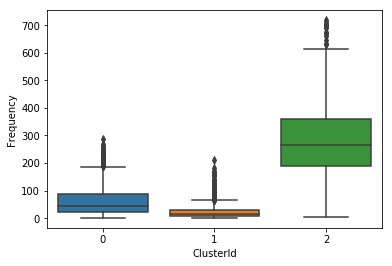

In [230]:
#plot
sns.boxplot(x='ClusterId',y='Frequency',data=grouped_df)

In [232]:
rfm_df_scaled.head()

,amount,frequency,recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [233]:
grouped_df.head()

,CustomerID,amount,Frequency,recency,ClusterId
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,2
2,12348.0,1797.24,31,74,0
3,12349.0,1757.55,73,18,0
4,12350.0,334.40,17,309,1


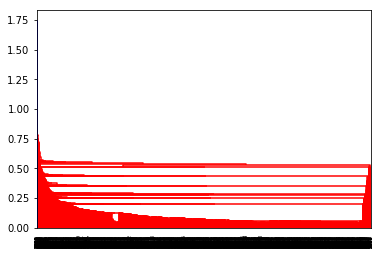

In [234]:
#single linkage
mergings=linkage(rfm_df_scaled,method='single',metric='euclidean')
dendrogram(mergings)
plt.show()

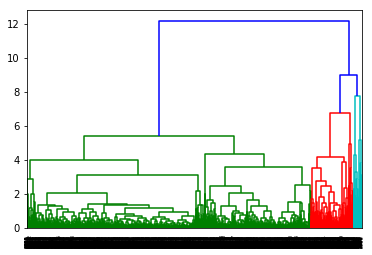

In [235]:
#complete linkage
mergings=linkage(rfm_df_scaled,method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [238]:
cluster_labels = cut_tree(mergings,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 0, ..., 0, 0, 0])

In [239]:
grouped_df['Cluster Labels'] = cluster_labels

In [241]:
grouped_df.head()

,CustomerID,amount,Frequency,recency,ClusterId,Cluster Labels
0,12346.0,0.00,2,325,1,0
1,12347.0,4310.00,182,1,2,1
2,12348.0,1797.24,31,74,0,0
3,12349.0,1757.55,73,18,0,0
4,12350.0,334.40,17,309,1,0


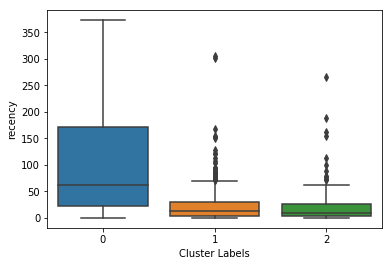

In [244]:
sns.boxplot(x='Cluster Labels',y='recency',data=grouped_df)